In [1]:
from IPython.display import display, HTML, Javascript

def f():
    return HTML("""
    <style>
        @font-face {
            /* تعریف نام فونت */
            font-family: 'BZar';
            /* اکسپلورر 9 به بعد */
            src: url('font/BZar.eot');
            /* بررسی نصب بودن فونت در سیستم کاربر */
            src: local('bZar'),
                 /* برای برخی از مرورگرها مانند سافاری */
                 local('b Zar'),
                 /* هک برای اکسپلورر 8 و ماقبل */
                 url('font/BZar.eot?#iefix') format('embedded-opentype'),
                 /* فرمت مناسب مرورگرهای خیلی جدید */
                 url('font/BZar.woff2') format('woff2'),
                 /* فرمت مناسب مرورگرهای تقریبا جدید */
                 url('font/BZar.woff') format('woff'),
                 /* تمام مرورگرها به جزء اکسپلورر */
                 url('font/BZar.ttf') format('truetype'),
                 /* نسخه‌های قدیمی سیستم عامل iOS */
                 url('font/BZar.svg#BZar') format('svg');
            font-style: normal;
            font-weight: normal;
            font-display: swap;
        }
    
    
        .reveal .slides {
            direction: rtl;
            text-align: right;
        }
        
        div {
            direction: ltr;
            text-align: left;
        }
        
        p > img {
          display: block;
          margin-left: auto;
          margin-right: auto;
          max-width:75%; 
          height:auto;
        }
        
        div.text_cell_render.rendered_html > *, li > p, .rendered_html p, #quarto-document-content > *
        {
            direction: rtl;
            text-align: right;
            font-family: BZar, Tahoma, Geneva, sans-serif;
            font-size: x-large;
            line-height: 26pt;
        }
        
        .jp-CodeMirrorEditor .jp-Editor .jp-InputArea-editor {
            direction: rtl !important;
        }
        
        .CodeMirror-lines .output_subarea .output_text .output_stream .output_stdout{
            direction: ltr !important;
        }
    </style>
    """)

f()

In [2]:
from IPython.display import display, HTML, Javascript

def g():
    return HTML("""
    <link rel="stylesheet" href="css/jquery.jqZoom.css" />
    <script src="js/jquery-1.12.4.min.js"></script>
    <script src="js/jquery.zoom.min.js"></script>
    <script>
        $(document).ready(function(){
            $("img").children().off();
            $('img')
            .wrap('<span style="display:inline-block"></span>')
            .css('display', 'block')
            .parent()
            .zoom({ on:'grab', duration: 150, magnify: 1 });
        });
    </script>
    """)

g()

# مقدمه ای بر یادگیری عمیق برای بینایی کامپیوتر

**این فصل موارد زیر را پوشش می‌دهد**
- 	آشنایی با شبکه‌های عصبی کانولوشنال (convnets)
- 	استفاده از افزایش داده‌ها برای کاهش بیش از حد برازش
- 	استفاده از یک convnet از پیش آموزش دیده برای انجام استخراج ویژگی
- 	تنظیم دقیق یک شبکه از پیش آموزش دیده

    -	بینایی کامپیوتر اولین و بزرگترین داستان موفقیت یادگیری عمیق است. 
        -	Google Photos، 
        -	جستجوی تصویر Google
        -	YouTube، 
        -	فیلترهای ویدیویی در برنامه‌های دوربین، 
        -	نرم‌افزار OCR
        -	رانندگی خودران، 
        -	روباتیک، 
        -	تشخیص پزشکی با کمک هوش مصنوعی، 
        -	کشاورزی خودمختار autonomous farming
    -	بینایی کامپیوتری حوزه‌ای است که منجر به ظهور اولیه یادگیری عمیق بین سال‌های 2011 تا 2015 شد. 
    -	به طور قابل توجهی در پاییز 2012، گروه هینتون در چالش تشخیص تصویری در مقیاس بزرگ ImageNet برنده شد. 
    -	جامعه پردازش تصویر در مقابل این پیشرفتها در ابتدا مقاومت می کردند!
    -	نوعی مدل یادگیری عمیق که اکنون تقریباً به طور جهانی در برنامه‌های بینایی رایانه استفاده می‌شود شبکه‌های کانولوشنی نامیده می‌شوند.
    -	در این فصل استفاده از این شبکه‌ها برای مسائل دسته‌بندی روی مجموعه داده‌های کوچک بررسی می‌شود.

## مقدمه‌ای بر شبکه‌های عصبی کانولوشنی
در فصل‌های قبل روی مسئله دسته‌بندی ارقام MNIST کار کردیم.
- دقت دسته‌بندی با کمک شبکه عصبی کامل متصل برابر 97.8٪ بود.
- در ادامه یک convnet ساده ایجاد می‌کنیم.

**Instantiating a small convnet**

In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

- یادآوری می‌شود که ورودی را برای دریافت یک تصویر تعریف می کنیم. 
- عدد ۱ برابر تعداد کانال هست که نشان‌دهنده تصاویر سیاه و سفید است.
- بعدا می توانیم تصاویر را به صورت دسته‌ای تحویل دهیم.

**نمایش summary مدل**

In [7]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         7385

### - می بینید که خروجی هر لایه Conv2D و MaxPooling2D یک تانسور شکل رتبه-3 است (ارتفاع، عرض، کانال). 
- ابعاد عرض و ارتفاع هر چه در مدل عمیق‌تر می‌شوید کاهش می‌یابد. 
- تعداد کانال‌ها توسط اولین آرگومان ارسال شده به لایه‌های Conv2D (32، 64 یا 128) کنترل می‌شود.
- پس از آخرین لایه Conv2D، در نهایت با یک خروجی شکل (3، 3، 128) مواجه می‌شویم - نقشه ویژگی 3 × 3 از 128 کانال. 
- گام بعدی این است که این خروجی را به یک طبقه‌بندی‌کننده کاملا متصل  تغذیه کنید: 
- قبل از اضافه کردن لایه‌های متراکم، خروجی‌های سه بعدی را با یک لایه Flatten به یک بعدی صاف می‌کنیم.
- در نهایت، ما طبقه بندی 10 طبقه‌ای را به کمک فعال‌ساز `softmax` می‌سازیم.
- چون برچسب‌های ما اعداد صحیح هستند، ما از نسخه پراکنده، `sparse_categorical_crossentropy` استفاده کنید.
- تعداد پارامتر‌ها از رابطه $(k^2N+1)C$ به دست می‌آید که $k$ اندازه کرنل و $N$ تعداد کانال ورودی و $C$ تعداد کانال خروجی است.
- به نتیجه عمل کانولوشن در دو محور عرض و ارتفاع اصطلاحا نقشه ویژگی feature map می‌گویند.

**Training the convnet on MNIST images**

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 18s 23ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0175 - val_accuracy: 0.9957
Epoch 2/5
750/750 [==============================] - 20s 27ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0125 - val_accuracy: 0.9973
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0217 - val_accuracy: 0.9930
Epoch 4/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0245 - val_accuracy: 0.9942
Epoch 5/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0358 - val_accuracy: 0.9904


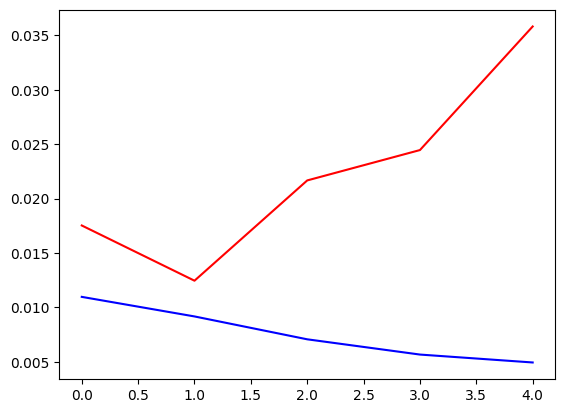

In [14]:
loss_train, loss_val = history.history['loss'], history.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(loss_train, 'b')
plt.plot(loss_val, 'r')
plt.show()

**ارزیابی convnet**

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 6s 11ms/step - loss: 0.0821 - accuracy: 0.9852
Test accuracy: 0.985


- در حالی که مدل با اتصال متراکم از فصل 2 دارای دقت تست 97.8٪ بود، convnet پایه دارای دقت تست 99.1٪ است: 
  -  میزان خطای نسبی را حدود 60٪ کاهش دادیم!

### The convolution operation

تفاوت اساسی بین یک لایه متصل متراکم و یک لایه کانولوشن: 
- لایه‌های متراکم الگوهای سراسری را در فضای ویژگی ورودی خود یاد می‌گیرند (به عنوان مثال، برای یک رقم MNIST، الگوهای شامل همه پیکسل‌ها)
- لایه‌های کانولوشن الگوهای محلی را یاد می‌گیرند. 

![تصاویر را می‌توان به الگوهای محلی مانند لبه ها، بافت‌ها و غیره تقسیم کرد.](img/08-01.png)

این مشخصه کلیدی دو ویژگی جالب به convnet‌ها می‌دهد:
1. الگوهایی که آنها یاد می‌گیرند، تغییر ناپذیر `translation-invariant` هستند. 
   * پس از یادگیری یک الگوی خاص در گوشه پایین سمت راست یک تصویر، یک convnet می‌تواند آن را در هر جایی تشخیص دهد
     * به عنوان مثال، در گوشه بالا سمت چپ. اگر یک مدل با اتصال متراکم در یک مکان جدید ظاهر شود، باید الگو را از نو یاد بگیرد. 
   * بنابراین شبکه‌های کانولوشنی به نمونه‌های آموزشی کمتری برای یادگیری بازنمایی‌هایی یا تعمیم بالا نیاز دارند.
2. آنها می‌توانند سلسله مراتب فضایی  `spatial hierarchies of patterns` الگوها را بیاموزند. 
   * اولین لایه پیچشی الگوهای محلی کوچک مانند لبه‌ها را یاد می‌گیرد، 
   * لایه کانولوشن دوم الگوهای بزرگ‌تری را که از ویژگی‌های لایه‌های اول ساخته شده‌اند و غیره می‌آموزد 
   * این امر به شبکه‌های کانولوشنی اجازه می‌دهد تا مفاهیم بصری پیچیده و انتزاعی را به طور مؤثر یاد بگیرند، زیرا دنیای بصری اساساً از نظر فضایی سلسله مراتبی است.

![دنیای بصری یک سلسله مراتب فضایی از ماژول‌های بصری را تشکیل می‌دهد: خطوط یا بافت‌های ابتدایی به اشیاء ساده مانند چشم یا گوش ترکیب می‌شوند که در مفاهیم سطح بالا مانند "گربه" ترکیب می‌شوند.](img/08-02.png)

![مفهوم نقشه پاسخ response map: یک نقشه 2 بعدی از حضور یک الگو در مکان‌های مختلف در ورودی](img/08-03.png)

- عملگر کانولوشن روی تکه‌های تصویر patch ها اعمال می‌شود و نقشه پاسخ تولید می‌کند.
- پارامتر‌های مهم لایه‌ی کانولوشنی
  - ابعاد کرنل
  - تعداد کانال خروجی (عمق فضای ویژگی خروجی)

- یک کانولوشن با 
  - لغزاندن این پنجره‌های 3×3 یا 5×5 روی نقشه ویژگی ورودی سه‌بعدی، 
  - توقف در هر مکان ممکن، 
  - استخراج پچ سه‌بعدی ویژگی‌های اطراف کار می‌کند. 
- سپس هر یک از این وصله‌های سه‌بعدی به یک بردار یک بعدی به اندازه عمق خروجی تبدیل می‌شوند، 
  - این کار از طریق ضرب تنسور با یک ماتریس وزن، به نام هسته کانولوشن انجام می‌شود
  - همان هسته در هر پچ دوباره استفاده می‌شود. 
- همه این بردارها (یکی در هر پچ) سپس به صورت مکانی در یک نقشه خروجی سه بعدی از شکل (ارتفاع، عرض، عمق ـ خروجی) جمع می‌شوند. 
- توجه داشته باشید که عرض و ارتفاع خروجی ممکن است به دو دلیل با عرض و ارتفاع ورودی متفاوت باشد:
    - مرزها `borders`
    - گام‌ها `strides`

![کانولوشن چطور کار می کند؟](img/08-04.png)

#### درک تاثیر مرز و لایه‌گذاری (padding)
- پس از اعمال عملگر کانولوشن نمی‌توانیم انتظار داشته باشیم تصویر نتیجه به همان اندازه ورودی باشد.
  - یک نقشه ویژگی 5 × 5 (مجموع 25 کاشی) را در نظر بگیرید. فقط 9 کاشی وجود دارد که می‌توانید یک پنجره 3 × 3 را در اطراف آنها قرار دهید و یک شبکه 3 × 3 را تشکیل دهید.
  - این حالت پیش‌فرض برای کانولوشن دو‌بعدی است که با نام `valid` خوانده می‌شود.

![تاثیر مرز](img/08-05.png)

- اگر بخواهیم همان ابعاد اولیه را دشته باشیم از لایه‌گذاری padding‌ استفاده می‌کنیم.
  - برای کرنل ۳ در ۳ باید به سطر‌ها و ستون‌های تصویر اصلی دو ردیف پیکسلی اضافه کنیم.
  - این حالت با پارامتر `padding=same` مشخص می‌شود.

![لایه‌گذاری](img/08-06.png)

#### درک مفهوم گام در کانولوشن convolution strides
- گام میزان حرکت کرنل را مشخص می‌کند و از عوامل تاثیر گذار در اندازه خروجی است.
- استفاده از گام 2 به این معنی است که عرض و ارتفاع نقشه ویژگی با ضریب 2 نمونه‌برداری می‌شود.
  - این حالت در مسائل دسته‌بندی کاربرد کمی دارد.

![گام پیچش برابر ۲](img/08-07.png)

### عملگر max-pooling
- Max Pooling شامل استخراج پنجره‌ها از نقشه‌های ویژگی ورودی و خروجی حداکثر مقدار هر کانال است. 
- معمولا با گام ۲ برخلاف کانولوشن که ۳ در ۳ هست.
- عدم استفاده از `max pooling` ۲ مشکل را در پی دارد:
  1. برای یادگیری یک سلسله مراتب فضایی از ویژگی‌ها مناسب نیست. 
    - پنجره‌های 3 × 3 در لایه سوم فقط حاوی اطلاعاتی است که از 7 × 7 پنجره در ورودی اولیه می‌آید.
    - الگوهای سطح بالایی که توسط convnet آموخته می‌شود با توجه به ورودی اولیه هنوز بسیار کوچک خواهد بود و برای یادگیری طبقه‌بندی ارقام احتمالا کافی نیست.
      - (سعی کنید یک رقم را فقط با نگاه کردن به آن از طریق پنجره‌هایی با ابعاد 7 × 7 پیکسل تشخیص دهید! ).
    - ما به ویژگی‌های آخرین لایه پیچیدگی نیاز داریم تا حاوی اطلاعاتی در مورد **کلیت ورودی** باشد.
  2. بدون `max pooling` نقشه ویژگی دارای 61952  ضریب خواهد بود که همراه با لایه‌ی متراکم با اندازه ۱۰ حدود نیم‌میلیون پارامتر می‌شود!
    - خطر بیش‌برازش

**An incorrectly structured convnet missing its max-pooling layers**

In [7]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model_no_max_pool.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_____________________________________________________

- بنابراین مزیت استفاده از `max pooling` کاهش تعداد پارامترها و ایجاد امکان نگاه کلان به تصویر برای دسته‌بندی است.
- می‌توان از `average pooling` هم استفاده کرد گرچه معمولا خیلی مفید نیست
  - به حداکثر حضور ویژگی‌های مختلف نسبت به حضور متوسط آنها آموزنده‌تر است. 

## آموزش یک convnet از ابتدا روی یک مجموعه داده کوچک
- یکی از مسائل رایج دسته‌بندی آموزش دسته‌بندی روی یک مجموعه داده‌ی کوچک است.
- به عنوان یک مثال عملی، ما بر طبقه‌بندی تصاویر به عنوان سگ یا گربه در مجموعه داده با مشخصات زیر تمرکز می‌کنیم.
  - 5000 عکس از گربه و سگ (2500 گربه، 2500 سگ) 
    -   2000 تصویر برای آموزش، 
    -   1000 تصویر برای اعتبارسنجی 
    -   2000 تصویر برای آزمایش .
- ابتدا آموزش را بدون چابک‌سازی انجام می‌دهیم تا به یک خط پایه برسیم.
  - دقت ۷۰٪
  - مسئله اصلی بیش‌برازش است.
- سپس از تکنیک داده‌افزایی `data augmentation` برای کاهش مشکل بیش‌برازش استفاده می‌کنیم.
  - دقت به حدود ۸۵٪ می‌رسد.
- استخراج ویژگی از یک مدل از پیش‌آموزش دیده
  - دقت ۹۷.۵٪
- تنظیم دقیق یک مدل از پیش‌آموزش دیده
  - دقت ۹۸.۵٪

**نکته:** این سه استراتژی - آموزش یک مدل کوچک از ابتدا، انجام استخراج ویژگی با استفاده از یک مدل از پیش آموزش دیده، و تنظیم دقیق یک مدل از پیش آموزش دیده - جعبه ابزار آینده شما را برای حل مسائل طبقه‌بندی تصاویر با مجموعه داده‌های کوچک تشکیل می‌دهند.

### ارتباط یادگیری عمیق برای مسائل با مجموعه داده‌های کوچک
با اینکه در مسئله مورد بحث تعداد داده‌های موجود کم هست، ولی بازهم شبکه‌های کانولوشنی نتایج قابل قبولی در پی دارند زیرا برای داده‌های حسب خوب کار می‌کنند.

### دانلود مجموعه داده

- دانلود از کگل نیازمند یکی از دو روش زیر است.
  - ساخت حساب کاربری و دانلود از آدرس زیر
    - [http://www.kaggle.com/c/dogs-vs-cats/data](www.kaggle.com/c/dogs-vs-cats/data)
  - استفاده از `Kaggle API`
    - In your account settings: 
      - API section => Create New API Token => ‍‍`kaggle.json` 
      - Upload it on `Colab` 
      - make sure that the file is only readable by the current user, yourself.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

- اولین باری که سعی می‌کنید داده‌ها را دانلود کنید، ممکن است با خطای "403 Forbidden" مواجه شوید.
  - این به این دلیل است که قبل از دانلود مجموعه داده باید شرایط مرتبط با آن را بپذیرید 
  - باید به آن برویدwww.kaggle.com/c/dogs-vs-cats/rules(در حالی که به حساب Kaggle خود وارد شده اید) و روی دکمه I Understand and Accept کلیک کنید. فقط یک بار باید این کار را انجام دهید.
  - 
- در نهایت، داده‌های آموزشی یک فایل فشرده با نام train.zip است.
-  مطمئن شوید که آن را از حالت فشرده خارج کرده اید (از حالت فشرده خارج کنید) بی صدا (-qq):


In [ ]:
!unzip -qq train.zip

![نمونه تصاویر سگ و گربه](img/08-08.png)

**کپی تصاویر به پوشه‌های training, validation و test**

In [4]:
# NOTE: this script is previously executed. You don't require to run it again

import os, shutil, pathlib


original_dir = pathlib.Path("/data/train")  # unzip dogs-vs-cats.zip beforehand
new_base_dir = pathlib.Path("data/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [Errno 17] File exists: 'data/cats_vs_dogs_small/train/cat'

### ساخت مدل

- ما مدل را با یک لایه Rescaling شروع می‌کنیم، که ورودی‌های تصویر (که مقادیر آنها در ابتدا در محدوده [0، 255] است) به محدوده [0، 1] تغییر مقیاس می‌دهد.
- عمق نقشه‌های ویژگی به تدریج در مدل افزایش می‌یابد (از 32 به 256)، در حالی که اندازه نقشه‌های ویژگی کاهش می‌یابد (از 180 × 180 به 7 × 7). 



**Instantiating a small convnet for dogs vs. cats classification**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**پیکربندی مدل برای آموزش**

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### پیش‌پردازش داده‌ها
مراحل زیر برای پیش‌پردازش تصاویر ورودی انجام می‌شود.

1.	فایل‌های تصویری را بخوانید.
2.	محتوای JPEG را به شبکه‌های پیکسلی RGB رمزگشایی کنید.
3.	اینها را به تانسورهای ممیز شناور تبدیل کنید.
4.	اندازه آنها را به یک اندازه مشترک تغییر دهید (از 180 × 180 استفاده خواهیم کرد).
5.	آنها را به صورت دسته ای بسته بندی کنید (ما از دسته‌های 32 تصویری استفاده خواهیم کرد).


**Using `image_dataset_from_directory` to read images**

In [16]:
# from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [17]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [18]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


- برای دسته بندی داده‌ها می‌توانیم از متد .batch() استفاده کنیم

In [19]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


- از متد `map` برای تغییر شکل عناصر استفاده می‌شود.


In [20]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**نمایش اشکال داده‌ها و برچسب‌های به دست آمده توسط مجموعه داده**

In [21]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**برازش مدل**

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2022-12-25 08:59:08.536969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-25 08:59:09.238186: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-12-25 08:59:10.223586: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-12-25 08:59:10.282534: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


63/63 [==============================] - 51s 577ms/step - loss: 0.9133 - accuracy: 0.5010 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 19s 286ms/step - loss: 0.7248 - accuracy: 0.5408 - val_loss: 0.6828 - val_accuracy: 0.5370
Epoch 3/30
63/63 [==============================] - 18s 286ms/step - loss: 0.7018 - accuracy: 0.5897 - val_loss: 0.6492 - val_accuracy: 0.6210
Epoch 4/30
63/63 [==============================] - 18s 284ms/step - loss: 0.6631 - accuracy: 0.6078 - val_loss: 1.6920 - val_accuracy: 0.5060
Epoch 5/30
63/63 [==============================] - 18s 285ms/step - loss: 0.6525 - accuracy: 0.6952 - val_loss: 0.6159 - val_accuracy: 0.6700
Epoch 6/30
63/63 [==============================] - 19s 296ms/step - loss: 0.5693 - accuracy: 0.7087 - val_loss: 0.5751 - val_accuracy: 0.6980
Epoch 7/30
63/63 [==============================] - 20s 307ms/step - loss: 0.5583 - accuracy: 0.7362 - val_loss: 0.5831 - val_accuracy: 0.6870
Epoch 8/30

**نمایش منحنی‌های loss و accuracy در طول آموزش**

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**ارزیابی مدل در مورد مجموعه داده تست**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### استفاده از افزونگی در داده‌ها  `data augmentation`

- بیش‌برازش  به دلیل داشتن نمونه‌های بسیار کم برای یادگیری است که باعث می‌شود شما نتوانید مدلی را آموزش دهید که بتواند به داده‌های جدید تعمیم دهد.
- اگر تعداد داده‌های ورودی کافی باشد و جنبه‌های ممکن تصویر ورودی را بتواند به درستی و کامل نشان دهد، مدل شما بیش‌برازش نمی‌کند.
- تقویت داده‌ها رویکرد تولید داده‌های آموزشی بیشتر از نمونه‌های آموزشی موجود را با افزایش نمونه‌ها از طریق تعدادی تبدیل تصادفی دارد که تصاویری با ظاهر باورپذیر به دست می‌دهد.
- هدف این است که، در زمان آموزش، مدل شما هرگز یک تصویر مشابه را دوبار نبیند. این 
  - تعمیم بهتر

**تعریف یک مرحله افزایش داده برای افزودن به مدل تصویر**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**نمایش تعدادی تصاویر تصادفی بعد از ایجاد افزونگی در داده‌های آموزشی**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

- برای مقابله بیشتر با بیش‌برازش می‌توانیم از یک لایه `dropout` هم استفاده کنیم.

**تعریف یک `convnet` جدید همراه با افزونگی در داده‌ها و `dropout`**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

- با توجه به استفاده از ابزارهایی برای چابک‌سازی مدل نیاز به تعداد بیشتری `epoch` برای بیش‌برازش داریم.

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**ارزیابی مدل روی مجموعه تست**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

**نکته:** گرچه می‌توانیم بهبودهای بیشتری را در مدل بدهیم ولی دقت به زحمت بیش از ۹۰٪ خواهد شد!

## استفاده از یک مدل از پیش آموزش دیده
- می‌توانید از یک مدل آموزش دیده روی مجموعه داده‌های بزرگ برای مدل‌سازی یک مسئله دسته‌بندی روی مجموعه داده‌ی کوچک استفاده کنید.
- اگر این مجموعه داده اصلی به اندازه کافی بزرگ و کلی باشد، ویژگی‌های آن می‌تواند برای بسیاری از مسايل بینایی کامپیوتری مختلف مفید باشد، حتی اگر این مسائل جدید شامل کلاس‌های کاملاً متفاوتی نسبت به کارهای اصلی باشد.
  - به عنوان مثال، می‌توانید یک مدل را در ImageNet آموزش دهید (که در آن کلاس‌ها عمدتاً حیوانات و اشیاء روزمره هستند) و سپس این مدل آموزش‌دیده را برای چیزی به دوردست‌تر از شناسایی وسایل مبلمان در تصاویر تغییر دهید.
- در اینجا از معماری VGG16 (از ماژول `keras.applications`) که در سال 2014 بر روی ImageNet آموزش داده شده استفاده می‌کنیم.
- دو راه برای استفاده از یک مدل از پیش آموزش دیده وجود دارد: 
1. استخراج ویژگی
2. تنظیم دقیق

### استخراج ویژگی با یک مدل از پیش آموزش دیده
استخراج ویژگی شامل استفاده از نمایش‌های آموخته شده توسط یک مدل قبلا آموزش دیده برای استخراج ویژگی‌های جالب از نمونه‌های جدید است. سپس این ویژگی‌ها از طریق یک طبقه بندی کننده جدید اجرا می‌شوند که از ابتدا آموزش داده شده است.
- قبلا دیدید که convnet شامل دو بخش زیر هست:
- 	لایه‌های کانولوشنی و pooling است (پایه کانولوشن مدل برای استخراج ویژگی که عمومی است.)
- 	یک طبقه‌بند تمام متصل (فاقد اطلاعات مکانی اشیا موجود در تصاویر - مربوط به مسئله خاص مورد بررسی ).

![ تعویض طبقه‌بندی‌کننده‌ها با حفظ همان پایه کانولوشن](img/08-12.png)

- لایه‌های اول شامل اطلاعات عام مانند لبه‌ها، رنگ‌ها و بافت‌ها هستند ولی لایه‌های بالاتر ویژگی‌های انتزاعی‌تری (مانند گوش گربه، چشم سگ و ...) را مدل می‌کنند. بنابراین با توجه به میزان تفاوت مسئله مورد بررسی با مدل آموزش‌دیده اولیه باید از تعداد لایه‌ی مناسب استفاده کرد. 

**Instantiating the VGG16 convolutional base**

In [7]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # عدم گنجاندن طبقه‌بند کلی
    input_shape=(180, 180, 3))

In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

- نقشه ویژگی نهایی دارای شکل (5، 5، 512) است. 
- این نقشه ویژگی است که در بالای آن لایه‌‌ی متراکم برای طبقه‌بندی‌ متصل می‌کنیم.
- 	استفاده از مدل آموزش‌دیده روی تصاویر و ذخیره نتایج روی دیسک و سپس اعمال لایه متراکم جدید (سرعت بالا – عدم امکان استفاده از افزونگی داده)
- 	اتصال لایه متراکم به انتهای شبکه آموزش‌دیده و آموزش کل شبکه از اول (روش گران - دقت بالاتر)



#### استخراج سریع ویژگی بدون افزایش داده ها
بايد داده‌ها را پیش‌پردازش کنیم تا داده‌ها در مقیاس درست قرار گیرند.

**Extracting the VGG16 features and corresponding labels**

In [9]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

NameError: name 'train_dataset' is not defined

In [ ]:
train_features.shape

** تعریف و آموزش طبقه بندی کننده با اتصال متراکم **

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

آموزش بسیار سریع است زیرا ما فقط باید با دو لایه متراکم سر و کار داشته باشیم - یک دوره حتی در CPU کمتر از یک ثانیه طول می‌کشد.


**رسم نتایج**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

![ معیارهای آموزش و اعتبارسنجی برای استخراج ویژگی ساده](img/08-13.png)

- دقت اعتبارسنجی حدود ۹۷٪
- علی‌رغم استفاده از `dropout` از همان ابتدا دچار بیش‌برازش شدیم، زیرا از افزونگی در داده استفاده نکردیم.


#### استخراج ویژگی همراه با افزایش داده ها
- روش دوم ایجاد مدلی است که `conv_base` را با یک طبقه‌بندی متراکم جدید زنجیره‌ای می‌کند و آموزش را به صورت `end2end` انجام می‌دهد. 
- بنابراین امکان افزونگی داده‌ای در ابتدای مدل وجود دارد.
- بسیار کند و گران هست.
- برای انجام این کار ابتدا پایه کانولوشن را فریز می‌کنیم:
o جلوگیری از به روز شدن وزن آنها در طول آموزش است. 
o اگر این کار را نکنیم، بازنمایی‌هایی قبلاً آموخته شده از بین می‌روند.
- در Keras، یک لایه یا مدل را با تنظیم ویژگی `trainable` آن بر روی `False` منجمد می‌کنیم.




**ایجاد و منجمد کردن پایه کانولوشنال VGG16 **

In [10]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

** چاپ لیست وزن‌های قابل آموزش قبل و بعد از انجماد **

In [11]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [12]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


** افزودن مرحله تقویت داده و یک طبقه‌بندی‌کننده به پایگاه کانولوشن **

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

چون افزونگي داده‌اي ايجاد كرديم تعداد epoch هاي بيشتري را برای آموزش نياز داريم تا بیش‌برازش را ببینیم.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

** ارزیابی مدل در مجموعه تست **

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

علی‌رغم هزینه‌ی زیادی که برای آموزش کردیم دقت افزایش آنچنانی نداشت (97.5٪)

### تنظیم دقیق یک مدل از پیش آموزش دیده

می‌توانیم چند لایه‌ی بالایی مدل پایه را (بجز batch normalization در صورت وجود) هم از حالت `freeze` خارج کنیم تا نمایش‌های انتزاعی مدل را بهبود دهد.
یادآوری می‌شود که لایه‌های بالایی تخصصی‌تر هستند و نباید در unfreeze کردن لایه‌ها خیلی دست و دل‌باز باشیم وگرنه احتمالا با مشکل بیش‌برازش و حجم بالای وزن‌ها برای آموزش مواجه می‌شویم.

![ تنظیم دقیق آخرین بلوک کانولوشنال شبکه VGG16](img/08-15.png)

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

ما روی ۱۰٪ داده‌های مسابقه اصلی کگل به یکی از بهترین نتایج یعنی دقت 98.5٪ روی داده‌های تست رسیدیم.

## خلاصه
-  Convnet‌ها بهترین نوع مدل‌های یادگیری ماشینی برای کارهای بینایی کامپیوتری هستند. آموزش از ابتدا حتی روی یک مجموعه داده بسیار کوچک، با نتایج مناسب امکان پذیر است.
-  Convnet‌ها با یادگیری سلسله مراتبی از الگوها و مفاهیم پیمانه‌ای برای نمایش دنیای بصری کار می‌کنند.
-  در یک مجموعه داده کوچک، مشکل اصلی بیش‌برازش است. 
-  برای داده‌های تصویری افزایش داده یک راه قدرتمند برای مبارزه با بیش‌برازش است.
-  استفاده مجدد از یک convnet موجود در یک مجموعه داده جدید از طریق «استخراج ویژگی» آسان است. این یک تکنیک ارزشمند برای کار با مجموعه داده‌های تصویری کوچک است.
-  به‌عنوان مکمل استخراج ویژگی، می‌توانید از «تنظیم دقیق» استفاده کنید، که برخی از نمایش‌هایی را که قبلاً توسط یک مدل موجود آموخته‌اند، با مسئله جدید تطبیق می‌دهد. البته این کار نیازمند کارآیی بیشتری است.